In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import csv

Loading in the data straight from GitHub to increase reliability from different machines.

In [51]:
url = "https://raw.githubusercontent.com/ndavis4904/stc510_Module3/main/crimestat.csv"
download = requests.get(url).content

df = pd.read_csv(io.StringIO(download.decode('utf-8')), quoting = csv.QUOTE_NONE)
df.head()

,"""INC NUMBER""","""OCCURRED ON""","""OCCURRED TO""","""UCR CRIME CATEGORY""","""100 BLOCK ADDR""","""ZIP""","""PREMISE TYPE"""
0,"""201600000052855""",11/01/2015 00:00,01/09/2016 00:00,"""MOTOR VEHICLE THEFT""","""N 43RD AVE & W CACTUS RD""","""85029""","""SINGLE FAMILY HOUSE"""
1,"""201600000594484""",11/01/2015 00:00,NaN,"""RAPE""","""13XX E ALMERIA RD""","""85006""","""SINGLE FAMILY HOUSE"""
2,"""201500002102327""",11/01/2015 00:00,11/01/2015 09:00,"""LARCENY-THEFT""","""51XX N 15TH ST""","""85014""","""APARTMENT"""
3,"""201500002101405""",11/01/2015 00:00,11/01/2015 05:00,"""MOTOR VEHICLE THEFT""","""102XX W MEDLOCK AVE""","""85307""","""SINGLE FAMILY HOUSE"""
4,"""201500002102668""",11/01/2015 00:00,11/01/2015 11:50,"""MOTOR VEHICLE THEFT""","""69XX W WOOD ST""","""85043""","""SINGLE FAMILY HOUSE"""


As seen below, if we are interested in where crimes are happening, looking at the entire list of locations is too much to be useful.

In [60]:
frequencies_full = df['"PREMISE TYPE"'].value_counts()
frequencies_full.plot.bar()

"SINGLE FAMILY HOUSE"                    25329
"APARTMENT"                              14957
"PARKING LOT"                            14148
"STREET / ROADWAY / ALLEY / SIDEWALK"    11596
"RETAIL BUSINESS"                        10852
                                         ...  
"GAMBLING FACILITY/CASINO/RACE TRACK"        2
"LAKE / WATERWAY / BEACH"                    1
"TRIBAL LANDS"                               1
"REST AREA"                                  1
"A                                           1
Name: "PREMISE TYPE", Length: 94, dtype: int64

I decided to look at some descriptive data in order to determine what would be the most interesting to find where they are most commonly occuring.

In [50]:
frequencies_full.describe()

count       94.000000
mean      1392.765957
std       3715.120593
min          1.000000
25%         22.000000
50%        194.500000
75%        747.250000
max      25329.000000
Name: "PREMISE TYPE", dtype: float64

I decided to go with all the crimes that were above the third quantile, or the upper 25% of crimes. This is much easier to see, and allows us to see that Single Family Homes are, by far, most frequently the object of crimes.

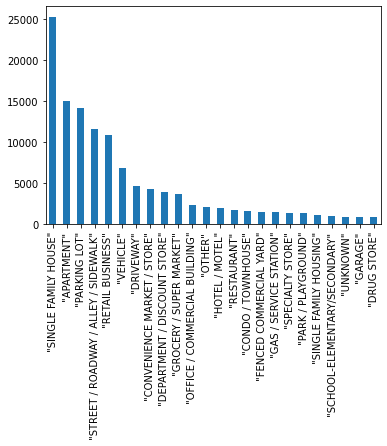

In [48]:
frequencies = df['"PREMISE TYPE"'].value_counts()[df['"PREMISE TYPE"'].value_counts()>750]
frequencies.plot.bar()


If we look into the types of crimes that are commited at Single Family Homes, we get the following distribution. 

In [71]:
prem_type = df.groupby('"PREMISE TYPE"')
sngle_hm = prem_type.get_group('"SINGLE FAMILY HOUSE"')
sngle_hm['"UCR CRIME CATEGORY"'].value_counts()

"BURGLARY"                                 0.497493
"LARCENY-THEFT"                            0.269888
"MOTOR VEHICLE THEFT"                      0.091002
"AGGRAVATED ASSAULT"                       0.080264
"RAPE"                                     0.024044
"DRUG OFFENSE"                             0.022425
"ROBBERY"                                  0.009081
"ARSON"                                    0.003277
"MURDER AND NON-NEGLIGENT MANSLAUGHTER"    0.002527
Name: "UCR CRIME CATEGORY", dtype: float64

To make this easier to understand, we can normalize it in order to see proportions. Just under 50% of the crimes that happen in Single Family Homes are Burglaries.

In [72]:
sngle_hm['"UCR CRIME CATEGORY"'].value_counts(normalize = True)

"BURGLARY"                                 0.497493
"LARCENY-THEFT"                            0.269888
"MOTOR VEHICLE THEFT"                      0.091002
"AGGRAVATED ASSAULT"                       0.080264
"RAPE"                                     0.024044
"DRUG OFFENSE"                             0.022425
"ROBBERY"                                  0.009081
"ARSON"                                    0.003277
"MURDER AND NON-NEGLIGENT MANSLAUGHTER"    0.002527
Name: "UCR CRIME CATEGORY", dtype: float64

We see a similar relationship if we look at Burglaries specifically. In this case, over 50% of Burglaries happen in Single Family Homes, significantly more than Apartments, which I would logically think would be about the same. If I had to venture a guess as to why, it would be because Single Family Homes have less traffic. If my own neighborhood is anything to compare it to, most houses don't even turn their front lights on when it gets dark.

In [73]:
crm_cat = df.groupby('"UCR CRIME CATEGORY"')
burg = crm_cat.get_group('"BURGLARY"')
burg['"PREMISE TYPE"'].value_counts(normalize = True)


"SINGLE FAMILY HOUSE"             0.534212
"APARTMENT"                       0.165126
"OFFICE / COMMERCIAL BUILDING"    0.043497
"RETAIL BUSINESS"                 0.027896
"GARAGE"                          0.022723
                                    ...   
"RAIL STATION"                    0.000085
"FIELD/WOODS"                     0.000042
"GARAGE / CARPORT"                0.000042
"AMUSEMENT PARK"                  0.000042
"A                                0.000042
Name: "PREMISE TYPE", Length: 65, dtype: float64

Outside of that tidbit, this is the distribution of each of the crimes that are commited.

In [80]:
crm = df['"UCR CRIME CATEGORY"'].value_counts()
crm

"LARCENY-THEFT"                            66216
"BURGLARY"                                 23648
"MOTOR VEHICLE THEFT"                      14391
"DRUG OFFENSE"                              9572
"AGGRAVATED ASSAULT"                        9306
"ROBBERY"                                   5640
"RAPE"                                      1981
"ARSON"                                      634
"MURDER AND NON-NEGLIGENT MANSLAUGHTER"      289
Name: "UCR CRIME CATEGORY", dtype: int64

The FBI define violent crimes as Murder and Non-Negligent Manslaughter, Rape, Robbery, and Aggravated Assault. If we look at Violent vs. Non-Violent crimes in Pheonex, we get the following comparison.

Text(0.5, 0, 'Violent vs Non-Violent Crimes')

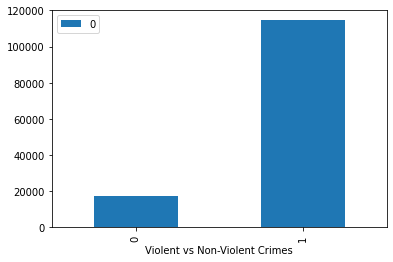

In [88]:
crm_lst = pd.DataFrame([[crm[8]+crm[6]+crm[5]+crm[4]], [crm[0]+crm[1]+crm[2]+crm[3]+crm[7]]])
crm_lst.plot.bar()
plt.xlabel('Violent vs Non-Violent Crimes')

When looking at all the crimes that happened across Pheonix during this time, it is comforting to see how small the proportion of violent crimes are to non-violent crimes.